In [56]:
import re
import os
import string
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import PIL
import seaborn as sn
import tensorflow as tf
from glob import glob
from tqdm import tqdm
from matplotlib import pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Load Data

In [72]:
base_folder = "../final_project/"
train_folder = "alphabet_bisindo"

In [76]:
# find directory
def get_dir(base,train,test):
    base_dir = os.path.join(os.getcwd(), base_folder)
    train_dir = os.path.join(base_folder, train_folder)
    return train_dir

In [78]:
# Load train dataset
def load_train_ds(train_dir,img_h,img_w,batch_size):
    train_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        validation_split=0.1,
        subset="training",
        seed=123,
        image_size=(img_h, img_w),
        batch_size=batch_size)
    return train_ds

In [80]:
# Load validation dataset
def load_val_ds(train_dir,img_h,img_w,batch_size):
    val_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        validation_split=0.1,
        subset="validation",
        seed=123,
        image_size=(img_h, img_w),
        batch_size=batch_size)
    return val_ds

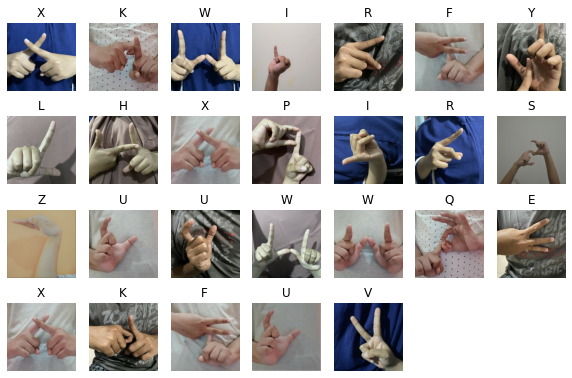

In [81]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(6,7 , i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
# Show data
def show_data(train_ds):
    class_names = train_ds.class_names
    plt.figure(figsize=(10, 10))
    for images, labels in train_ds.take(1):
        for i in range(len(class_names)):
            ax = plt.subplot(6,7 , i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

In [82]:
def create_model(img_rows, img_cols, color_type):
    model = tf.keras.models.Sequential([
      # First convolution layer
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (img_rows, img_cols, color_type)),
      tf.keras.layers.MaxPooling2D(2, 2),
      # Second convolution layer
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # Third convolution layer
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # Fourth convolution layer
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(26, activation='softmax')])
    return model

In [ ]:
num_labels = 26 # Number of labels (A - Z)
img_rows = 300 # Number of image rows (resize)
img_cols = 300 # Number of image columns (resize)
color_type = 3 # Convert image to RGB

In [83]:
model = create_model(img_rows, img_cols, color_type)
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'img_rows' is not defined

In [ ]:
# Read and normalize train images
x_train, x_test, y_train, y_test = read_and_normalize_train_data(img_rows, img_cols, color_type)

In [ ]:
batch_size = 300
n_epochs = 100
result = model.fit(x_train, y_train,
                   validation_data = (x_test, y_test),
                   epochs = n_epochs, batch_size = batch_size, verbose = 1)